# Предварительный анализ тарифов «Смарт» и «Ультра»

Описание проекта

Выполнение предварительного анализа тарифов «Смарт» и «Ультра» на выборке клиентов (500 пользователей). 
 кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#from google.colab import files # Использовал для загрузки файлов в Google colab
#uploaded = files.upload()

pd.options.display.max_columns = None # Использовал для просмотра широких таблиц
pd.options.display.max_rows = None

## Изучение данных из файлов

### Изучение данных из файла calls.csv

In [2]:
# Загружаем файл calls.csv
df_calls = pd.read_csv('/datasets/calls.csv', sep=',')

# Посмотрим первые 5 строк таблицы
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
# Смотрим общую информацию о таблице
df_calls.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
# Проверим датафрейм на наличие дубликатов
df_calls.duplicated().sum() 

0

### Изучение данных из файла internet.csv

In [5]:
# Загружаем файл internet.csv
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')

# Посмотрим первые 5 строк таблицы
df_internet.head() 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# Смотрим общую информацию о таблице
df_internet.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
# Проверим датафрейм на наличие дубликатов
df_internet.duplicated().sum() 

0

### Изучение данных из файла messages.csv

In [8]:
# Загружаем файл messages.csv
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')

# Посмотрим первые 5 строк таблицы
df_messages.head() 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
# Смотрим общую информацию о таблице
df_messages.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
# Проверим датафрейм на наличие дубликатов
df_messages.duplicated().sum() 

0

### Изучение данных из файла tariffs.cs

In [11]:
# Загружаем файл tariffs.csv
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')

# Посмотрим первые 5 строк таблицы
df_tariffs.head() 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
# Смотрим общую информацию о таблице
df_tariffs.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Изучение данных из файла users.csv

In [13]:
# Загружаем файл users.csv
df_users = pd.read_csv('/datasets/users.csv', sep=',')

# Посмотрим первые 5 строк таблицы
df_users.head() 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
# Смотрим общую информацию о таблице
df_users.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
df_users.duplicated().sum() #Проверим датафрейм на наличие дубликатов

0

## Предобработка данных

### Предобработка датафрейма calls

In [16]:
# Смотрим на наличие артефактов
df_calls['duration'].unique()

array([ 0.  ,  2.85, 13.8 , ..., 24.36, 24.5 , 26.9 ])

In [17]:
# Смотрим на наличие артефактов
df_calls['call_date'].unique()

array(['2018-07-25', '2018-08-17', '2018-06-11', '2018-09-21',
       '2018-12-15', '2018-11-02', '2018-10-18', '2018-08-22',
       '2018-09-15', '2018-08-15', '2018-05-28', '2018-07-05',
       '2018-09-29', '2018-12-11', '2018-07-27', '2018-08-11',
       '2018-08-02', '2018-06-15', '2018-12-04', '2018-08-20',
       '2018-09-25', '2018-07-21', '2018-08-27', '2018-08-25',
       '2018-12-12', '2018-07-19', '2018-11-14', '2018-12-26',
       '2018-12-02', '2018-10-08', '2018-09-23', '2018-10-09',
       '2018-05-25', '2018-06-13', '2018-10-25', '2018-12-29',
       '2018-07-12', '2018-11-20', '2018-06-05', '2018-10-13',
       '2018-06-26', '2018-07-14', '2018-07-20', '2018-12-01',
       '2018-06-17', '2018-10-24', '2018-11-26', '2018-09-19',
       '2018-05-30', '2018-12-21', '2018-12-23', '2018-07-03',
       '2018-10-04', '2018-09-16', '2018-11-21', '2018-10-28',
       '2018-08-29', '2018-08-13', '2018-07-18', '2018-06-03',
       '2018-09-03', '2018-08-14', '2018-11-01', '2018-

In [18]:
# Округлим значения длительности звонков до минут
df_calls['duration'] = np.ceil(df_calls['duration']) 

In [19]:
# Перепишем столбец call_date в формат время-дата
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [20]:
# Создадим колонку месяц
month = df_calls['call_date'].dt.month.astype(str)
df_calls['month'] = month

In [21]:
# Проверим результат
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


### Предобработка датафрейма internet

In [22]:
# Смотрим на наличие артефактов
df_internet['mb_used'].unique()

array([ 112.95, 1052.81, 1197.26, ...,  460.75,  247.59,   23.72])

In [23]:
# Смотрим на наличие артефактов
df_internet['session_date'].unique()

array(['2018-11-25', '2018-09-07', '2018-06-25', '2018-08-22',
       '2018-09-24', '2018-10-02', '2018-07-11', '2018-10-08',
       '2018-09-03', '2018-09-27', '2018-08-28', '2018-06-20',
       '2018-08-09', '2018-08-11', '2018-07-21', '2018-06-09',
       '2018-06-03', '2018-11-01', '2018-11-28', '2018-08-20',
       '2018-12-06', '2018-07-02', '2018-10-19', '2018-10-30',
       '2018-06-17', '2018-11-06', '2018-09-14', '2018-11-15',
       '2018-08-26', '2018-10-15', '2018-11-27', '2018-10-17',
       '2018-10-07', '2018-08-05', '2018-07-06', '2018-10-03',
       '2018-11-02', '2018-06-30', '2018-11-17', '2018-06-06',
       '2018-11-20', '2018-05-31', '2018-10-29', '2018-12-10',
       '2018-07-04', '2018-12-28', '2018-05-28', '2018-09-15',
       '2018-09-09', '2018-09-17', '2018-09-01', '2018-11-03',
       '2018-11-04', '2018-06-16', '2018-12-07', '2018-08-25',
       '2018-06-15', '2018-06-26', '2018-10-06', '2018-12-01',
       '2018-10-14', '2018-06-07', '2018-12-15', '2018-

In [24]:
# Перепишем столбец session_date в формат время-дата
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [25]:
# Создадим колонку месяц
month = df_internet['session_date'].dt.month.astype(str)
df_internet['month'] = month

In [26]:
# Проверим результат
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


### Предобработка датафрейма messages

In [27]:
# Смотрим на наличие артефактов
df_messages['message_date'].unique()

array(['2018-06-27', '2018-10-08', '2018-08-04', '2018-06-16',
       '2018-12-05', '2018-06-20', '2018-11-19', '2018-10-29',
       '2018-06-25', '2018-12-18', '2018-05-30', '2018-07-06',
       '2018-08-20', '2018-10-30', '2018-09-14', '2018-08-28',
       '2018-06-29', '2018-07-07', '2018-05-29', '2018-05-28',
       '2018-08-15', '2018-07-29', '2018-12-07', '2018-12-25',
       '2018-10-31', '2018-07-30', '2018-11-05', '2018-12-15',
       '2018-12-04', '2018-06-30', '2018-12-22', '2018-10-02',
       '2018-08-29', '2018-09-09', '2018-07-19', '2018-09-04',
       '2018-07-15', '2018-10-25', '2018-12-08', '2018-06-01',
       '2018-06-12', '2018-12-21', '2018-10-07', '2018-08-30',
       '2018-06-04', '2018-10-01', '2018-06-22', '2018-10-12',
       '2018-10-15', '2018-10-24', '2018-09-20', '2018-08-22',
       '2018-09-17', '2018-08-27', '2018-07-26', '2018-06-05',
       '2018-11-16', '2018-09-06', '2018-11-26', '2018-11-18',
       '2018-09-21', '2018-07-11', '2018-07-16', '2018-

In [28]:
# Перепишем столбец message_date в формат время-дата
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [29]:
# Создадим колонку месяц
month = df_messages['message_date'].dt.month.astype(str)
df_messages['month'] = month

### Предобработка датафрейма users

In [30]:
# Смотрим на наличие артефактов
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам

In [31]:
# Создаем выборку из таблицы calls
df_agg_calls = df_calls.groupby(by=['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()

# Посмострим результат
df_agg_calls.head(10)

,user_id,month,count,sum
0,1000,10,57,350.0
1,1000,11,43,338.0
2,1000,12,46,333.0
3,1000,5,22,159.0
4,1000,6,43,172.0
5,1000,7,47,340.0
6,1000,8,52,408.0
7,1000,9,58,466.0
8,1001,11,59,430.0
9,1001,12,63,414.0


### Расчет трафика по месяцам

In [32]:
# Создаем выборку из таблицы internet
df_agg_internet = df_internet.groupby(by=['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()

# Посмострим результат
df_agg_internet.head()

,user_id,month,sum
0,1000,10,14702.49
1,1000,11,14756.47
2,1000,12,9817.61
3,1000,5,2253.49
4,1000,6,23233.77


In [33]:
# Учитывая метод расчета трафика добавим столбец gb_used
df_agg_internet['num_gb'] = np.ceil(df_agg_internet['sum']/1024)

# Посмострим результат
df_agg_internet.head()

,user_id,month,sum,num_gb
0,1000,10,14702.49,15.0
1,1000,11,14756.47,15.0
2,1000,12,9817.61,10.0
3,1000,5,2253.49,3.0
4,1000,6,23233.77,23.0


### Расчет количества смс по месяцам

In [34]:
# Создаем выборку из таблицы messages
df_agg_messages = df_messages.groupby(by=['user_id', 'month'])['id'].agg('count').reset_index()

# Посмострим результат
df_agg_messages.head()

,user_id,month,id
0,1000,10,73
1,1000,11,58
2,1000,12,70
3,1000,5,22
4,1000,6,60


### Формирование сводной таблицы

In [35]:
# Объединим выборки по звонкам и использованному трафику
df_svod = df_agg_calls.merge(df_agg_internet, on=['user_id','month'], how='outer')

# Для удобства дальнейшей обработки переименуем столбцы
df_svod.rename(columns={'count': 'num_call', 'sum_x':'num_min', 'sum_y':'num_mb'}, inplace=True)

# Посмострим результат
df_svod.head(10)

,user_id,month,num_call,num_min,num_mb,num_gb
0,1000,10,57.0,350.0,14702.49,15.0
1,1000,11,43.0,338.0,14756.47,15.0
2,1000,12,46.0,333.0,9817.61,10.0
3,1000,5,22.0,159.0,2253.49,3.0
4,1000,6,43.0,172.0,23233.77,23.0
5,1000,7,47.0,340.0,14003.64,14.0
6,1000,8,52.0,408.0,14055.93,14.0
7,1000,9,58.0,466.0,14568.91,15.0
8,1001,11,59.0,430.0,18429.34,18.0
9,1001,12,63.0,414.0,14036.66,14.0


In [36]:
# Добавим столбец с количеством смс
df_svod = df_svod.merge(df_agg_messages, on=['user_id','month'], how='outer')

# Для удобства дальнейшей обработки переименуем столбец
df_svod.rename(columns={'id': 'num_mess'}, inplace=True)

# Посмострим результат
df_svod.head(10)

,user_id,month,num_call,num_min,num_mb,num_gb,num_mess
0,1000,10,57.0,350.0,14702.49,15.0,73.0
1,1000,11,43.0,338.0,14756.47,15.0,58.0
2,1000,12,46.0,333.0,9817.61,10.0,70.0
3,1000,5,22.0,159.0,2253.49,3.0,22.0
4,1000,6,43.0,172.0,23233.77,23.0,60.0
5,1000,7,47.0,340.0,14003.64,14.0,75.0
6,1000,8,52.0,408.0,14055.93,14.0,81.0
7,1000,9,58.0,466.0,14568.91,15.0,57.0
8,1001,11,59.0,430.0,18429.34,18.0,NaN
9,1001,12,63.0,414.0,14036.66,14.0,NaN


In [37]:
# Добавим датафрейм users
df_svod = df_svod.merge(df_users, on=['user_id'], how='outer')

# Посмострим результат
df_svod.head(10)

,user_id,month,num_call,num_min,num_mb,num_gb,num_mess,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,10,57.0,350.0,14702.49,15.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,11,43.0,338.0,14756.47,15.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,12,46.0,333.0,9817.61,10.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,5,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,6,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,7,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,8,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,9,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,59.0,430.0,18429.34,18.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,63.0,414.0,14036.66,14.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [38]:
# Для объединения таблиц переименуем стобец датафрейма tariffs
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

# Проверим результат
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [39]:
# Добавим датафрейм users
df_svod = df_svod.merge(df_tariffs, on=['tariff'], how='outer')

# Посмострим результат
df_svod.head(10)

,user_id,month,num_call,num_min,num_mb,num_gb,num_mess,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,10,57.0,350.0,14702.49,15.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,11,43.0,338.0,14756.47,15.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,12,46.0,333.0,9817.61,10.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,5,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,6,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,7,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,8,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,9,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1003,10,108.0,855.0,14768.14,15.0,83.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
9,1003,11,115.0,824.0,11356.89,12.0,94.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1


In [40]:
# Создаем функцию для расчета помесячной выручки с каждого пользователя
def month_revenue (df):
    sum = 0
    minut = df['num_min'] - df['minutes_included']
    if minut > 0:
      sum = minut * df['rub_per_minute']
    gb = df['num_gb'] - df['mb_per_month_included'] / 1024  
    if gb > 0:
        sum += gb * df['rub_per_gb']
    mess = df['num_mess'] - df['messages_included']
    if mess > 0:
        sum += mess * df['rub_per_message'] 
    sum = sum + df['rub_monthly_fee']
    return sum

In [41]:
# Применим функцию
df_svod['revenue'] = df_svod.apply(month_revenue, axis=1)

# Посмотрим результат
df_svod.head(10)

,user_id,month,num_call,num_min,num_mb,num_gb,num_mess,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,10,57.0,350.0,14702.49,15.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,11,43.0,338.0,14756.47,15.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,12,46.0,333.0,9817.61,10.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,5,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,6,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,7,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,8,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,9,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1003,10,108.0,855.0,14768.14,15.0,83.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.0
9,1003,11,115.0,824.0,11356.89,12.0,94.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.0


### Выводы
При проведении предобработки данных неожиданных значений в таблицах не выявил.

В таблице tariffs заменил название столбца 'tariff_name' на 'tariff' для удобства дальнейшей обработки

Для удобства дальнейшей обработки сформировал сводную таблицу.

Расчитал выручку с каждого клиента, результат поместил в сводную таблицу.

## Анализ тарифов

### Подготовка данных для анализ тарифа Ultra

In [42]:
# Сформируем таблицу для анализа тарифа
df_svod_ultra = df_svod[df_svod['tariff'] == 'ultra']

# Проверим результат
df_svod_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 22 columns):
user_id                  986 non-null int64
month                    985 non-null object
num_call                 951 non-null float64
num_min                  951 non-null float64
num_mb                   975 non-null float64
num_gb                   975 non-null float64
num_mess                 795 non-null float64
age                      986 non-null int64
churn_date               77 non-null object
city                     986 non-null object
first_name               986 non-null object
last_name                986 non-null object
reg_date                 986 non-null object
tariff                   986 non-null object
messages_included        986 non-null int64
mb_per_month_included    986 non-null int64
minutes_included         986 non-null int64
rub_monthly_fee          986 non-null int64
rub_per_gb               986 non-null int64
rub_per_message          986 non-null int64

In [43]:
# Размер выборки по тарифу Ультра
len(df_svod_ultra)

986

In [44]:
# Сформируем сводную таблицу для тарифа Ultra с расчетом среднего, дисперсии и стандартного отклонения
df_ultra_month = df_svod_ultra.pivot_table(
    index =['month'], aggfunc = {'user_id':'count','num_min':[np.mean, np.var, np.std], 
                                 'num_gb':[np.mean, np.var, np.std],'num_mess':[np.mean, np.var, np.std], 
                                 'revenue':[np.mean, np.var, np.std]}).reset_index()

# Посмотрим результат
df_ultra_month

month     num_gb                          num_mess                          \
               mean        std         var       mean        std          var   
0      1  13.222222   6.666667   44.444444  43.428571  27.663798   765.285714   
1     10  20.229508   9.415818   88.657634  69.776699  49.260598  2426.606511   
2     11  19.954887   9.566248   91.513101  66.159292  47.426742  2249.295828   
3     12  21.898551  10.025726  100.515180  72.008547  48.609368  2362.870616   
4      2  13.090909  10.225594  104.562771  32.937500  26.709471   713.395833   
5      3  17.648649  10.693238  114.345345  47.800000  42.739521  1826.666667   
6      4  16.963636   9.457436   89.443098  44.512821  37.526743  1408.256410   
7      5  19.666667   9.552017   91.241026  48.769231  39.491183  1559.553544   
8      6  19.168675   8.886574   78.971202  52.313433  43.996284  1935.672999   
9      7  20.733333   9.630009   92.737079  62.136986  46.805245  2190.730974   
10     8  19.783019  10.122116  102.457233  58.897727  44.977399  2022.966432   
11     9  19.412281   9.149507   83.713476  63.294737  43.666501  1906.763270   

       num_min                                 revenue              \
          mean         std            var         mean         std   
0   428.111111  269.757968   72769.361111  1950.000000    0.000000   
1   581.728814  311.673445   97140.336086  2065.853659  386.891620   
2   562.364341  297.404815   88449.624031  2092.164179  409.375762   
3   614.925373  328.604674  107981.031983  2138.848921  482.296858   
4   297.125000  296.512528   87919.679348  1975.000000   84.698955   
5   489.648649  333.743765  111384.900901  2014.864865  207.787573   
6   475.301887  256.976322   66036.830189  2001.818182  196.252775   
7   534.250000  273.643958   74881.015873  2059.701493  403.323204   
8   497.469136  293.291071   86019.652160  2039.285714  315.948698   
9   564.397727  294.877241   86952.587121  2118.131868  446.001774   
10  530.611650  301.942964   91169.553588  2083.177570  399.701771   
11  558.882883  314.003032   98597.904341  2024.347826  246.854352   

                  user_id  
              var   count  
0        0.000000       9  
1   149685.125950     123  
2   167588.514196     134  
3   232610.259618     139  
4     7173.913043      24  
5    43175.675676      37  
6    38515.151515      55  
7   162669.606513      67  
8    99823.580034      84  
9   198917.582418      91  
10  159761.505907     107  
11   60937.070938     115

### Подготовка данных для анализа тарифа Smart

In [45]:
# Сформируем таблицу для анализа тарифа
df_svod_smart = df_svod[df_svod['tariff'] == 'smart']

# Проверим результат
df_svod_smart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 986 to 3215
Data columns (total 22 columns):
user_id                  2230 non-null int64
month                    2229 non-null object
num_call                 2223 non-null float64
num_min                  2223 non-null float64
num_mb                   2228 non-null float64
num_gb                   2228 non-null float64
num_mess                 1922 non-null float64
age                      2230 non-null int64
churn_date               112 non-null object
city                     2230 non-null object
first_name               2230 non-null object
last_name                2230 non-null object
reg_date                 2230 non-null object
tariff                   2230 non-null object
messages_included        2230 non-null int64
mb_per_month_included    2230 non-null int64
minutes_included         2230 non-null int64
rub_monthly_fee          2230 non-null int64
rub_per_gb               2230 non-null int64
rub_per_message     

In [46]:
# Размер выборки по тарифу Смарт
len(df_svod_smart)

2230

In [47]:
# Сформируем сводную таблицу для тарифа Ultra с расчетом среднего, дисперсии и стандартного отклонения
df_smart_month = df_svod_smart.pivot_table(
    index =['month'], aggfunc = {'user_id':'count','num_min':[np.mean, np.var, np.std], 'num_gb':[np.mean, np.var, np.std],
                                 'num_mess':[np.mean, np.var, np.std], 'revenue':[np.mean, np.var, np.std]}).reset_index()

# Посмотрим результат
df_smart_month

month     num_gb                        num_mess                         \
               mean       std        var       mean        std         var   
0      1   8.735294  6.277950  39.412656  20.000000  15.878707  252.133333   
1     10  16.880952  5.735594  32.897042  39.082677  27.138589  736.503019   
2     11  17.000000  5.213535  27.180952  39.881481  26.671359  711.361366   
3     12  18.201780  5.457705  29.786544  42.264808  28.852160  832.447114   
4      2  11.844828  6.095157  37.150938  27.940000  20.987275  440.465714   
5      3  15.233766  5.705252  32.549897  35.550725  25.880117  669.780477   
6      4  13.625000  5.594600  31.299550  35.864583  22.756662  517.865680   
7      5  15.907801  5.862594  34.370010  39.032787  25.274014  638.775776   
8      6  15.951220  5.649046  31.911716  38.577465  27.048767  731.635801   
9      7  15.875622  5.780956  33.419453  38.988506  26.820747  719.352468   
10     8  16.807692  5.381715  28.962859  38.750000  27.698611  767.213054   
11     9  16.392308  5.087643  25.884110  39.219731  26.504821  702.505555   

       num_min                                revenue               \
          mean         std           var         mean          std   
0   203.852941  154.231454  23787.341355   721.323529   438.766641   
1   427.590444  186.787393  34889.530319  1364.853741   842.773037   
2   436.647619  176.353653  31100.611101  1343.047468   795.729727   
3   479.985119  197.816702  39131.447539  1578.531157  1034.735951   
4   298.689655  190.820041  36412.287961   827.603448   540.702011   
5   390.051948  191.893604  36823.155161  1164.623377   698.025091   
6   367.133929  186.489161  34778.207127   963.089286   562.064543   
7   387.361702  186.601343  34820.061094  1197.510638   722.973153   
8   398.067485  173.091075  29960.520109  1204.018293   745.738005   
9   408.353234  179.583601  32250.269602  1223.950249   738.470208   
10  423.269231  184.870956  34177.270551  1320.595745   792.224318   
11  430.266409  181.522807  32950.529526  1249.946154   732.590262   

                 user_id  
             var   count  
0   1.925162e+05      34  
1   7.102664e+05     294  
2   6.331858e+05     316  
3   1.070678e+06     337  
4   2.923587e+05      58  
5   4.872390e+05      77  
6   3.159166e+05     112  
7   5.226902e+05     141  
8   5.561252e+05     164  
9   5.453382e+05     201  
10  6.276194e+05     235  
11  5.366885e+05     260

### Создадим функцию для построения гистограмм для среднего, дисперсии и отклонения

In [48]:
def graffics (df, df1, type):

    ax = df.plot(kind= 'bar', x='month', y=(type, 'mean'), figsize=(15, 5),  
    label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
    df1.plot(kind='bar', x='month', y=(type, 'mean'), ax=ax, figsize=(15, 5), color='r',
    label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
    if type == 'num_gb':
        plt.title('Сравнительная гистограмма использования интренет трафика на тарифах Ultra и Smart')
        plt.ylabel('Гб')
    elif type == 'num_min':
        plt.title('Сравнительная гистограмма использования трафика минут на тарифах Ultra и Smart')
        plt.ylabel('Мин')
    elif type == 'num_mess':
        plt.title('Сравнительная гистограмма использования смс на тарифах Ultra и Smart')
        plt.ylabel('Кол-во смс')    
    elif type == 'revenue':
        plt.title('Сравнительная гистограмма выручки на тарифах Ultra и Smart')
        plt.ylabel('Руб')    
    plt.xlabel('Месяц')

    ax = df.plot(kind= 'bar', x='month', y=(type, 'var'), figsize=(15, 5),  
    label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
    df1.plot(kind='bar', x='month', y=(type, 'var'), ax=ax, figsize=(15, 5), color='r',
    label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
    if type == 'num_gb':
        plt.title('Сравнительная гистограмма дисперсий значений интренет трафика на тарифах Ultra и Smart')
        plt.ylabel('Гб')
    elif type == 'num_min':
        plt.title('Сравнительная гистограмма дисперсий значений трафика минут на тарифах Ultra и Smart')
        plt.ylabel('Мин')
    elif type == 'num_mess':
        plt.title('Сравнительная гистограмма дисперсий значений использования смс на тарифах Ultra и Smart')
        plt.ylabel('Кол-во смс')    
    elif type == 'revenue':
        plt.title('Сравнительная гистограмма дисперсий значений выручки на тарифах Ultra и Smart')
        plt.ylabel('Руб')    
    plt.xlabel('Месяц')

    ax = df.plot(kind= 'bar', x='month', y=(type, 'std'), figsize=(15, 5),  
    label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
    df1.plot(kind='bar', x='month', y=(type, 'std'), ax=ax, figsize=(15, 5), color='r',
    label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
    if type == 'num_gb':
        plt.title('Сравнительная гистограмма стандартных отклонений значений интренет трафика на тарифах Ultra и Smart')
        plt.ylabel('Гб')
    elif type == 'num_min':
        plt.title('Сравнительная гистограмма стандартных отклонений значений трафика минут на тарифах Ultra и Smart')
        plt.ylabel('Мин')
    elif type == 'num_mess':
        plt.title('Сравнительная гистограмма стандартных отклонений значений использования смс на тарифах Ultra и Smart')
        plt.ylabel('Кол-во смс')    
    elif type == 'revenue':
        plt.title('Сравнительная гистограмма стандартных отклонений значений выручки на тарифах Ultra и Smart')
        plt.ylabel('Руб')    
    plt.xlabel('Месяц')

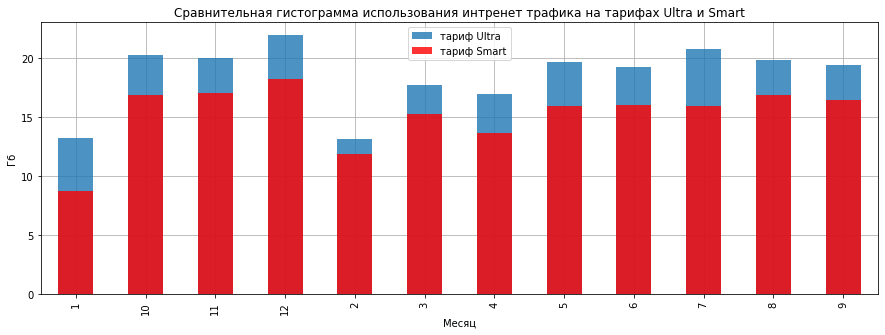

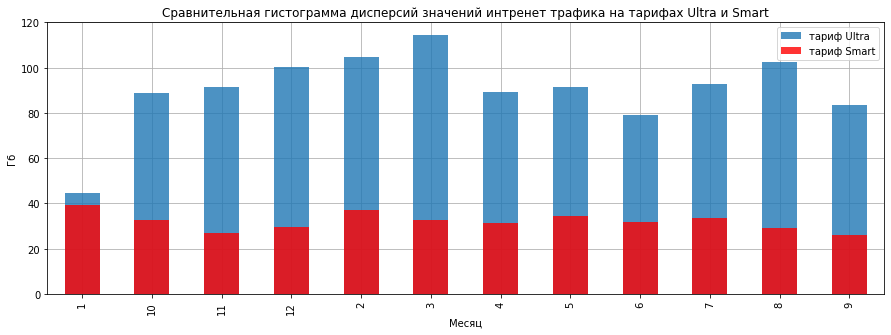

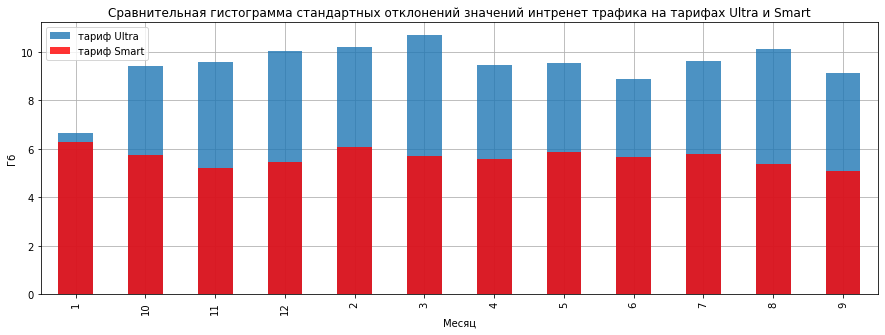

In [49]:
# Построение гистограмм для расхода трафика
graffics (df_ultra_month, df_smart_month, 'num_gb' )

Из гистограммы расходования трафика видно, что расход трафика выше в тарифе Ultra. 

Из гистограмм дисперсии и стандартных отклонений видно, что разброс значений выше в тарифе Ultra, т.е. импользование трафика пользователями более неоднородно, чем в тарифе Smart

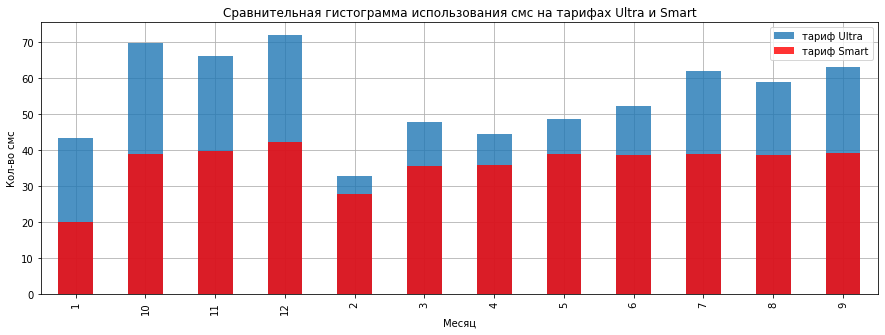

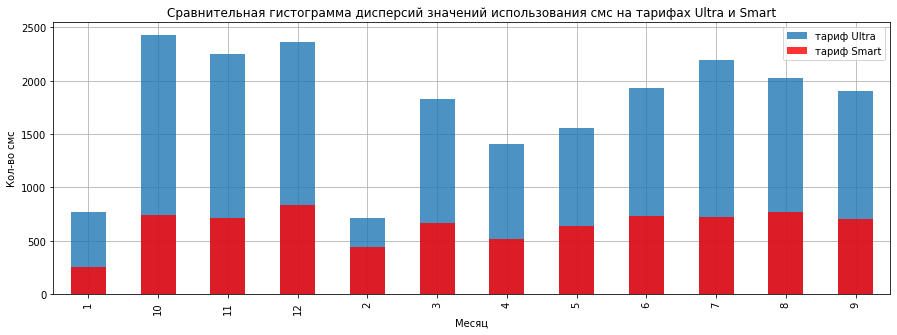

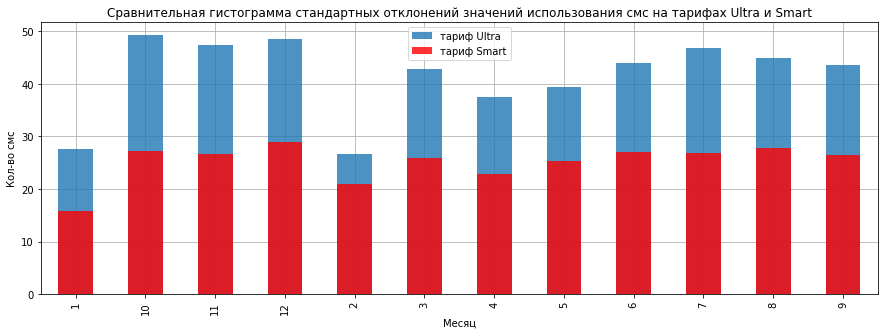

In [50]:
# Построение гистограмм для расхода смс трафика
graffics (df_ultra_month, df_smart_month, 'num_mess' )

Из гистограммы расходования смс видно, что использование смс выше в тарифе Ultra.

Из гистограмм дисперсии и стандартных отклонений видно, что разброс значений выше в тарифе Ultra, т.е. импользование смс, как и в предыдущем случае крайне неоднородно.


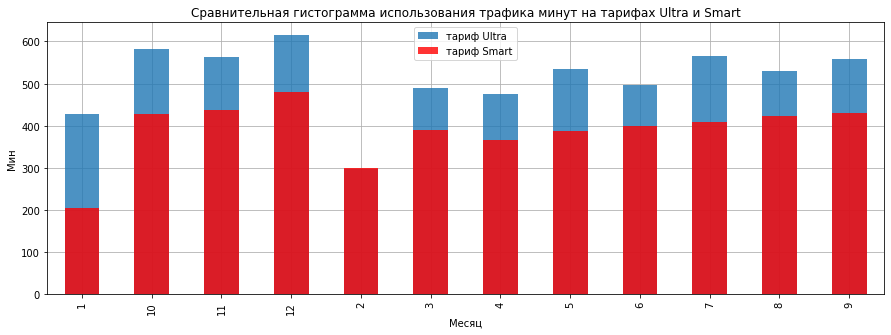

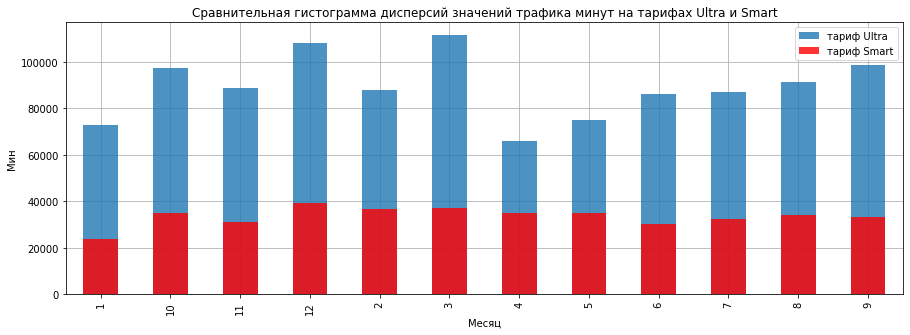

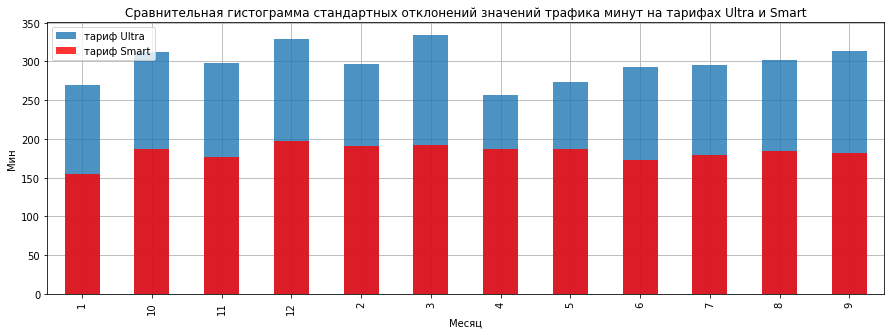

In [51]:
# Построение гистограмм для расхода минут
graffics (df_ultra_month, df_smart_month, 'num_min' )

Из гистограммы расходования минут звонков видно, что расход минут выше в тарифе Ultra, за исключением 2-го месяца, где они сравнялись для двух тарифов.

Из гистограмм дисперсии и стандартных отклонений видно, что разброс значений выше в тарифе Ultra, т.е. использование минут пользователями крайне неоднородно.

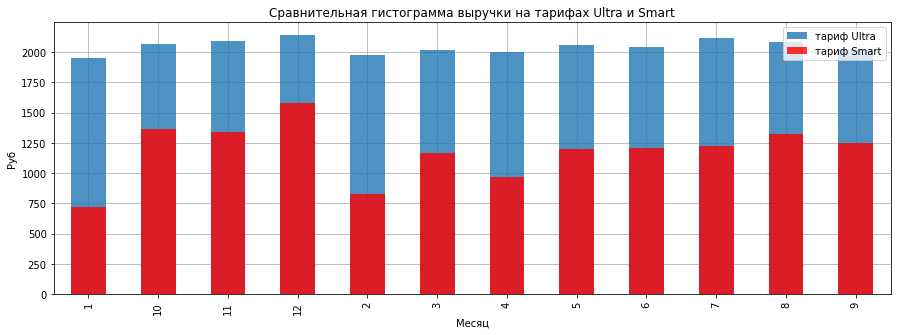

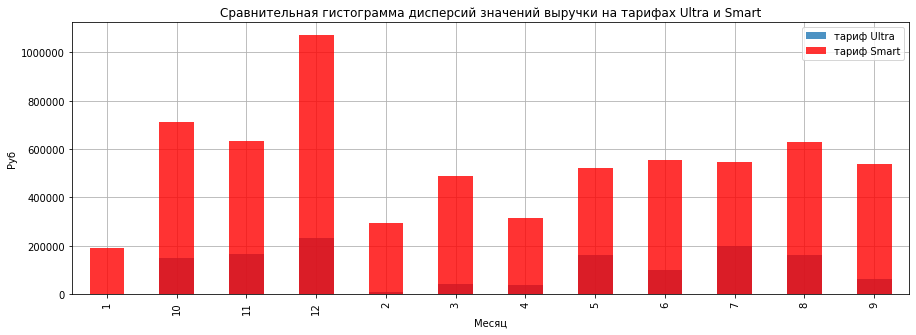

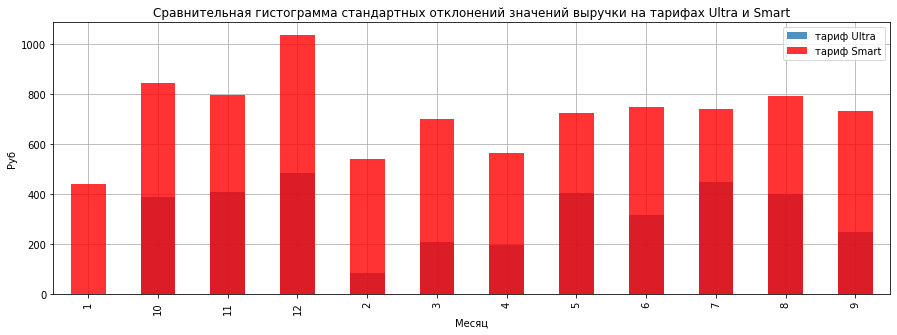

In [52]:
# Построение гистограмм для полученной выручки
graffics (df_ultra_month, df_smart_month, 'revenue' )

Из гистограммы выручки видно, что выручка выше в тарифе Ultra.

Из гистограмм дисперсии и стандартных отклонений видно, что разброс значений выше в тарифе Smart, т.е. пользование услугами крайне неоднородно.

### Добавленные гистограммы

Text(0, 0.5, 'Частота')

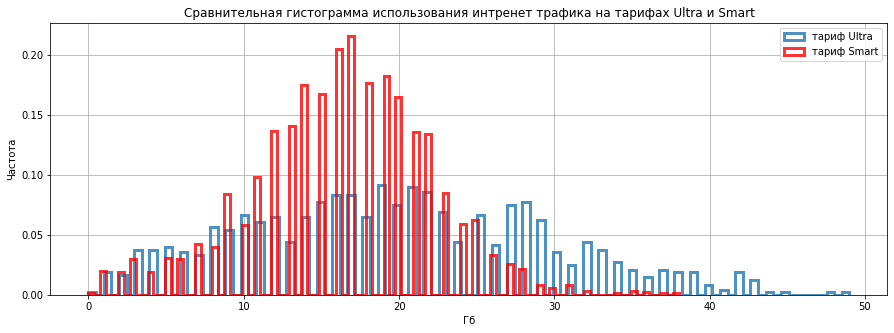

In [53]:
# Построим сравнительную гистограмму использования интренет трафика на тарифах Ultra и Smart
ax = df_svod_ultra['num_gb'].plot(kind='hist', bins=100, density=True, histtype='step',
                         figsize=(15, 5), label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
df_svod_smart['num_gb'].plot(kind='hist', bins=100, density=True, histtype='step', ax=ax,
                        color='r', label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
plt.title('Сравнительная гистограмма использования интренет трафика на тарифах Ultra и Smart')
plt.xlabel('Гб')
plt.ylabel('Частота')



Судя по приведенной гистограмме пользователи тарифа Smart стараются "выбирать" включенный трафик по максимуму, тогда как пользователи тарифа Ultra расходуют его более равномерно и, судя по выбросу в сторону увеличения объема трафика, спокойно относятся к его расходу сверх тарифа

Text(0, 0.5, 'Частота')

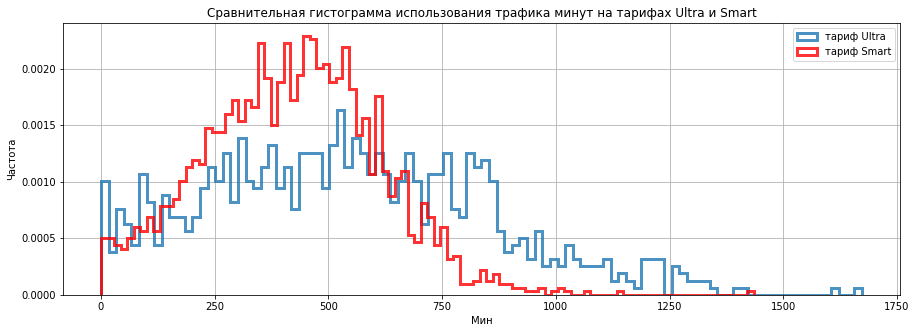

In [54]:
# Построим сравнительную гистограмму использования трафика минут на тарифах Ultra и Smart
ax = df_svod_ultra['num_min'].plot(kind='hist', bins=100, density=True, histtype='step',
                         figsize=(15, 5), label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
df_svod_smart['num_min'].plot(kind='hist', bins=100, density=True, histtype='step', ax=ax,
                        color='r', label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
plt.title('Сравнительная гистограмма использования трафика минут на тарифах Ultra и Smart')
plt.xlabel('Мин')
plt.ylabel('Частота')

Судя по приведенной гистограмме пользователи тарифа Smart стараются "выбирать" включенный трафик минут по максимуму и стараются не выходить за предоставленный лимит
Пользователи тарифа Ultra расходуют его более равномерно и, в основном, предоставленный лимит не расходуют даже наполовину

Text(0, 0.5, 'Частота')

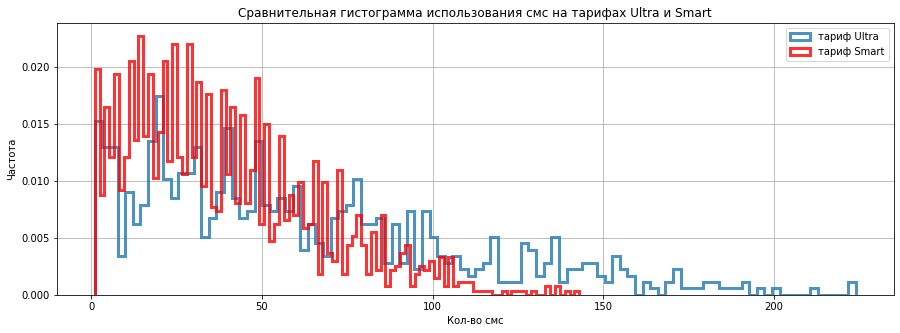

In [55]:
# Построим сравнительную гистограмму использования смс на тарифах Ultra и Smart
ax = df_svod_ultra['num_mess'].plot(kind='hist', bins=100, density=True, histtype='step',
                         figsize=(15, 5), label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
df_svod_smart['num_mess'].plot(kind='hist', bins=100, density=True, histtype='step', ax=ax,
                        color='r', label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
plt.title('Сравнительная гистограмма использования смс на тарифах Ultra и Smart')
plt.xlabel('Кол-во смс')  
plt.ylabel('Частота')

Абоненты тарифа Smart более активно пользуются услугой до своего лимита 50 смс, сверх - активность резко падает
Для тарифа Ultra число использованных смс не доходит даже до 30 % лимита
 

Text(0, 0.5, 'Частота')

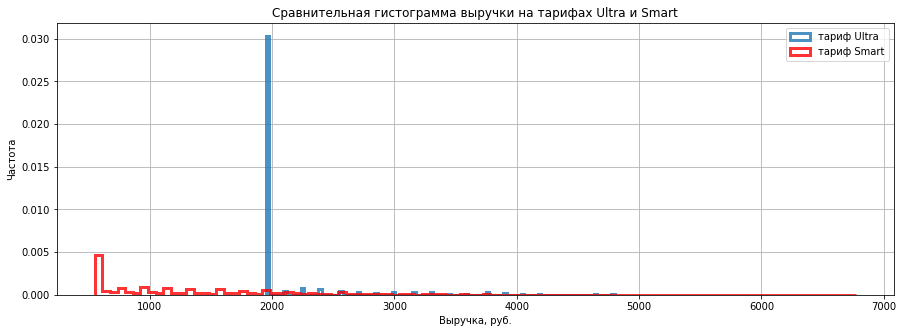

In [56]:
# Построим сравнительную гистограмму выручки на тарифах Ultra и Smart
ax = df_svod_ultra['revenue'].plot(kind='hist', bins=100, density=True, histtype='step',
                         figsize=(15, 5), label='тариф Ultra', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
df_svod_smart['revenue'].plot(kind='hist', bins=100, density=True, histtype='step', ax=ax,
                        color='r', label='тариф Smart', grid=True, legend=True, zorder=3, linewidth=3, alpha=0.8)
plt.title('Сравнительная гистограмма выручки на тарифах Ultra и Smart')
plt.xlabel('Выручка, руб.')  
plt.ylabel('Частота')

Из построенной сравнительной гистограммы  видно, что два всплеска соответствуют размеру абонентской платы. А вот выброс в сторону увеличения выручки больше для тарифа Smart, т.е. абоненты этого тарифа больше доплачивают за дополнительные услуги

### Выводы

Исходя из промежуточных выводов о том, что:

- из гистограммы расходования трафика видно, что расход трафика выше в тарифе Ultra. 

- из гистограммы расходования смс видно, что использование смс выше в тарифе Ultra.

- из гистограммы расходования минут звонков видно, что расход минут выше в тарифе Ultra, за исключением 2-го месяца, где они сравнялись для двух тарифов.

- из гистограммы выручки видно, что выручка выше в тарифе Ultra.

можно сделать вывод, что абоненты тарифа Ultra более активно пользуются всеми предлагаемыми услугами.

Изначально в тариф Ultra включено большее количество минут, смс и Гб, что нашло отражение на гистограммах.


## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [57]:
# Нулевая гипотеза - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы

# Альтернативная гипотеза - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

# критический уровень статистической значимости
alpha = 0.05  

# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(df_ultra_month[('revenue', 'mean')], df_smart_month[('revenue', 'mean')], equal_var=False)
# Поскольку дисперсии генеральных совокупностей не равны equal_var=False

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
   print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Из расчета видно, что верна альтернативная гипотеза, т.е. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [58]:
# Сформируем таблицу пользователей региона Москва

# Делаем срез сводной таблицы по параметру Москва
df_msk = df_svod.query('city == "Москва"')

# Расчитаем размер выборки
len_msk = len(df_msk)

# Формируем сводную таблицу для анализа
df_msk = df_msk.pivot_table(index =['month'], aggfunc = {'revenue':np.mean})

# Посмотрим результат
df_msk

,revenue
month,
1,1475.000000
10,1547.790123
11,1575.175824
12,1647.406250
2,1175.142857
3,1649.600000
4,1503.310345
5,1465.128205
6,1500.723404


In [59]:
# Сформируем таблицу пользователей из других регионов

# Делаем срез сводной таблицы по параметру не Москва
df_no_msk = df_svod.query('city != "Москва"')

# Расчитаем размер выборки
len_no_msk = len(df_no_msk)

# Формируем сводную таблицу для анализа
df_no_msk = df_no_msk.pivot_table(index =['month'], aggfunc = {'revenue':np.mean})

# Посмотрим результат
df_no_msk


,revenue
month,
1,865.000000
10,1577.369048
11,1563.821727
12,1766.089474
2,1161.014706
3,1396.106383
4,1263.550725
5,1477.568047
6,1483.706468


In [60]:
# Нулевая гипотеза - Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

# Альтернативная гипотеза - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

# критический уровень статистической значимости

alpha = 0.05

# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(df_msk['revenue'], df_no_msk['revenue'], equal_var=False)
# Поскольку дисперсии генеральных совокупностей не равны equal_var=False

if results.pvalue < alpha: # введите ваш код тут:
    print("Отвергаем нулевую гипотезу")
else:
   print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [62]:
from scipy.stats import bartlett
stat, p = bartlett(df_msk['revenue'], df_no_msk['revenue'])
p

0.04992822441734714

Из расчета видно, что верна нулевая гипотеза, т.е. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

Text(0.5, 0, 'Месяц')

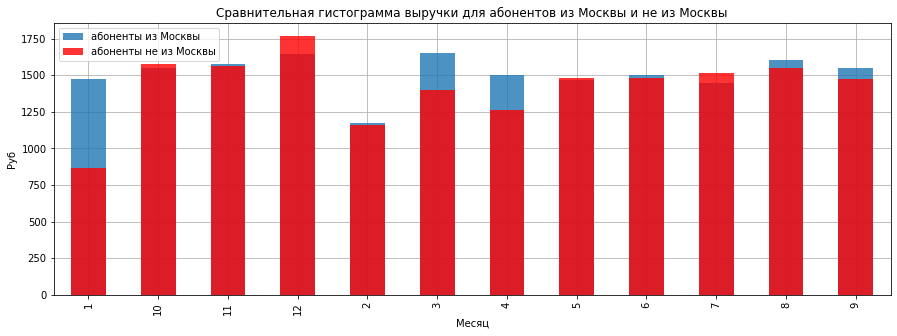

In [61]:
# Построим сравнительную гистограмму выручки для абонентов из Москвы и не из Москвы
ax = df_msk.plot(kind= 'bar', y=('revenue'), figsize=(15, 5),  
    label='абоненты из Москвы', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
df_no_msk.plot(kind='bar',  y=('revenue'), ax=ax, figsize=(15, 5), color='r',
    label='абоненты не из Москвы', grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
plt.title('Сравнительная гистограмма выручки для абонентов из Москвы и не из Москвы')
plt.ylabel('Руб')
plt.xlabel('Месяц')

## Выводы

Анализ использования по видам услуг.

Интернет трафик

Из гистограммы расходования трафика видно, что расход трафика выше в тарифе Ultra.

Судя по приведенной сравнительной гистограмме пользователи тарифа Smart стараются "выбирать" включенный трафик по максимуму, тогда как пользователи тарифа Ultra расходуют его более равномерно и, судя по выбросу в сторону увеличения объема трафика, спокойно относятся к его расходу сверх тарифа.

СМС

Из гистограммы расходования смс видно, что использование смс выше в тарифе Ultra.

Из гистограмм дисперсии и стандартных отклонений видно, что разброс значений выше в тарифе Ultra, т.е. использование смс неоднородно.

Абоненты тарифа Smart более активно пользуются услугой до своего лимита 50 смс, сверх - активность резко падает
Для тарифа Ultra число использованных смс не доходит даже до 30 % лимита

Минуты разговора

Из гистограммы расходования минут звонков видно, что расход минут выше в тарифе Ultra, за исключением 2-го месяца, где они сравнялись для двух тарифов.

Из гистограмм дисперсии и стандартных отклонений видно, что разброс значений выше в тарифе Ultra, т.е. использование минут пользователями крайне неоднородно.

Анализ выручки по тарифам

Из гистограммы выручки видно, что выручка выше в тарифе Ultra.

Из построенной сравнительной гистограммы  видно, что два всплеска соответствуют размеру абонентской платы. А вот выброс в сторону увеличения выручки больше для тарифа Smart, т.е. абоненты этого тарифа чаще доплачивают за дополнительные услуги.

Сравнение тарифов. 

Абоненты тарифа Ultra: 

- более активно пользуются всеми предлагаемыми услугами.

- Изначально в тариф Ultra включено большее количество минут, смс и Гб, что нашло отражение на гистограммах.

- Средняя выручка компании от клиентов тарифа Ultra выше чем от клиентов тарифа Smart. 

- Не используют включенные 3000 мин и 1000 смс

Абоненты тарифа Smart:

- чаще пользуются дополнительными услугами (вне лимитов тарифа), поскольку включенных лимитов оказывается недостаточно

- более активно пользуются услугой смс в пределах лимита в тарифе

- даже при использовании дополнительных услуг в среднем платят меньше, чем абоненты тарифа Ultra

- распределение по суммам оплаты более неоднородно, нежели в тарифе Ultra

- Интересное наблюдение - части абонентов, использующих тариф Smart, похоже выгоднее будет перейти на тариф Ultra. 

Средняя выручка от пользователей из Москвы равна выручке пользователей из других регионов

С точки зрения выручки - компании более выгодны пользователи тарифа Ультра. Как по выручке от абонентской платы, так и по дополнительному трафику (который абоненты этого тарифа расходуют больше и чаще).

